<a href="https://colab.research.google.com/github/nmeka41/nmeka41hds5210-2023/blob/main/final/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Programming for Health Data Scientists HDS5210,02 - 2023 Final Project**

There is lot of research done between the smoking, Body Mass Index and medical expenses. In this final project I am going to work on research based on the association between smoking status, range of economic and health outcomes which has emphasis on BMI, insurance costs, and diabetes.
The main intention is to make health and policy professionals to understand the smoking status of persons health and financial securities. It also helps to make people aware of value of smoking programs, and healthcare interventions.


The main motive of the project was to inspect the following

1.  To ascertain whether the BMIs of smokers and non-smokers differ statistically significantly.
2. To investigate the potential significance of smoking as a predictor of diabetes after adjusting for age and BMI.   
3.To calculate the financial effects of smoking on health insurance premiums in order to shed light on the financial burden of smoking.
4. To comprehend how smoking incidence varies among age groups and how it can affect insurance costs and health outcomes.




## **1.Data sources and Methodology**

1.1 **Data Sources**

The following data sources was loaded from

Diabetes data was Grasped from   https://www.kaggle.com/datasets/saurabh00007/diabetescsv as CSV format.

Insurance data was  loaded from https://www.kaggle.com/datasets/awaiskaggler/insurance-csv as CSV format.

This dataset was loaded from https://www4.stat.ncsu.edu/%7Eboos/var.select/diabetes.tab.txt as JSON Format

**1.2 Loading diabetes dataset**

•	Here, In several columns such Pregnancies, SkinThickness, and Insulin, there is a mixture of non-zero and zero numbers. This could indicate that for some people, important measures were not made or recorded.

•	Significant variation in the range of glucose levels indicates a varied group of people with different blood sugar management levels.

•	The Outcome variable implies that the data contains both non-diabetic (0) and diabetic (1) individuals, enabling comparisons between these two groups.

•	Individuals in the dataset range widely in age, from a minimum of 21 to a high of at least 63 years old.


In [18]:
import pandas as pd
diabetes = pd.read_csv ('/content/diabetes.csv')
print(diabetes)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

**1.3 Loading insurance dataset**

•	The mixture of smokers and non-smokers might be utilized to examine how smoking affects medical expenses.

•	Some people appear to be single adults if they have no children, while others appear to have one or more children, suggesting varying sizes of families.

•	The insurance charges exhibit a notable degree of unpredictability, suggesting the possibility of intricate relationships between many variables and the incurred expenses.

•	Multivariate analysis, including any interactions between the variables (e.g., does smoking have a different influence on charges based on age or region?), is probably possible with this dataset in order to investigate the impact of these variables on insurance costs.



In [19]:
import pandas as pd
insurance = pd.read_csv ('/content/insurance.csv')
print(insurance)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


**1.4 Loading data package JSON dataset**

•	Comprising "AGE", "BMI", "BP", "S1" to "S6", and "Y", which probably correspond to several health-related parameters.

•	Has a range of blood pressure, age, and BMI data, suggesting a varied sample group.


•	Seems comprehensive and well-organized, making it appropriate for machine learning or statistical analysis applications in health research.


In [20]:
import pandas as pd
datapackage = pd.read_json('/content/datapackage.json')
print(datapackage)


     AGE   BMI      BP   S1     S2    S3    S4      S5   S6    Y
0     59  32.1  101.00  157   93.2  38.0  4.00  4.8598   87  151
1     48  21.6   87.00  183  103.2  70.0  3.00  3.8918   69   75
2     72  30.5   93.00  156   93.6  41.0  4.00  4.6728   85  141
3     24  25.3   84.00  198  131.4  40.0  5.00  4.8903   89  206
4     50  23.0  101.00  192  125.4  52.0  4.00  4.2905   80  135
..   ...   ...     ...  ...    ...   ...   ...     ...  ...  ...
437   60  28.2  112.00  185  113.8  42.0  4.00  4.9836   93  178
438   47  24.9   75.00  225  166.0  42.0  5.00  4.4427  102  104
439   60  24.9   99.67  162  106.6  43.0  3.77  4.1271   95  132
440   36  30.0   95.00  201  125.2  42.0  4.79  5.1299   85  220
441   36  19.6   71.00  250  133.2  97.0  3.00  4.5951   92   57

[442 rows x 10 columns]


## **2.Integrating Diabetes and Insurance Datasets for Holistic Health and Economic Analysis**

**2.1 Merging diabetes and insurance datasets**

Combining the diabetes and insurance datasets according to 'Age' and 'BMI' yields a combined dataset that may add value to the study by enabling the investigation of the relationship between diabetes-related health indicators and financial variables like insurance premiums. Combining the data based on these shared columns may lead to a dataset that takes demographic factors into account and may show trends and correlations between insurance costs and diabetes status.

In [21]:
import pandas as pd
# Renaming columns in the Diabetes dataset to match the Insurance dataset
insurance.rename(columns={'age': 'Age', 'bmi': 'BMI'}, inplace=True)
# Defining common columns for merging
common_columns = ['Age', 'BMI']
# Merging datasets based on common columns
merged_data = pd.merge(diabetes, insurance, on=common_columns)
print(merged_data)


    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            10      168             74              0        0  38.0   
1             5      166             72             19      175  25.8   
2             7      159             64              0        0  27.4   
3             5       88             66             21       23  24.4   
4             7       62             78              0        0  32.6   
5             1       81             72             18       40  26.6   
6             4      144             58             28      140  29.5   
7             4      151             90             38        0  29.7   
8             0      177             60             29      478  34.6   
9             0      138             60             35      167  34.6   
10            9      164             84             21        0  30.8   
11            6      119             50             22      176  27.1   
12            2      146              0            

**2.2 Merging insurance  and Data package JSON dataset**

Data on health and insurance are combined in the DataFrame. Insurance prices, demographics (age, sex, and smoker status), and health metrics (BMI, blood pressure, and S1–S6 values) are all combined. These variables include age, BMI, and smoking status variations; the dataset may be useful for insurance cost analysis.

In [22]:
# Loading JSON file into data frame
datapackage = pd.read_json('datapackage.json')
# Adding an Age column to the data frame
datapackage['Age'] = datapackage.index
datapackage.head()
# Merging two data frames
merged_data2 = pd.merge(insurance, datapackage, on='Age')
print(merged_data2)

      Age     sex   BMI_x  children smoker     region      charges  AGE  \
0      19  female  27.900         0    yes  southwest  16884.92400   41   
1      19    male  24.600         1     no  southwest   1837.23700   41   
2      19  female  28.600         5     no  southwest   4687.79700   41   
3      19    male  20.425         0     no  northwest   1625.43375   41   
4      19  female  28.900         0     no  southwest   1743.21400   41   
...   ...     ...     ...       ...    ...        ...          ...  ...   
1333   39  female  23.870         5     no  southeast   8582.30230   48   
1334   39    male  32.340         2     no  southeast   6338.07560   48   
1335   39    male  34.100         2     no  southeast  23563.01618   48   
1336   39    male  29.925         1    yes  northeast  22462.04375   48   
1337   39  female  26.315         2     no  northwest   7201.70085   48   

      BMI_y    BP   S1     S2    S3   S4      S5  S6    Y  
0      24.7  83.0  187  108.2  60.0  3.

**2.3 Merging Diabetes and Data package JSON dataset**

The two datasets in the Data Frame are diabetes and health. Comprehensive diabetes-related metrics like "BMI_x," "Diabetes Pedigree Function," "Pregnancies," "Glucose," "Blood Pressure," "Skin Thickness," "Insulin," and "BMI_x" are included. It also includes BMI ('BMI_y'), blood pressure ('BP'), age-related data ('Age' and 'AGE'), and other health indicators ('S1' through 'S6', and 'Y'). The inclusion of two BMI columns ('BMI_x' and 'BMI_y') and two columns labelled 'Age' and 'AGE' raises the possibility of redundancy that has to be clarified. This dataset appears to be well-suited for a thorough examination of diabetes and how it relates to different health indicators, providing a wealth of information for healthcare research or predictive modelling.

In [23]:
# Loading JSON file into data frame
datapackage = pd.read_json('datapackage.json')
# Adding an Age column based on  data frame
datapackage['Age'] = datapackage.index
datapackage.head()
# Merging two data frames
merged_data3 = pd.merge(diabetes, datapackage, on='Age')
print(merged_data3)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI_x  \
0              6      148             72             35        0   33.6   
1              8       99             84              0        0   35.4   
2              7      136             90              0        0   29.9   
3              1      164             82             43       67   32.8   
4             11      138             74             26      144   36.1   
..           ...      ...            ...            ...      ...    ...   
763            2      119              0              0        0   19.6   
764            9      134             74             33       60   25.9   
765            8      120             78              0        0   25.0   
766            4      145             82             18        0   32.5   
767            8       91             82              0        0   35.6   

     DiabetesPedigreeFunction  Age  Outcome  AGE  BMI_y    BP   S1     S2  \
0                     

## **3.Analyzing the Correlation Between Health Metrics and Regional Variations in Insurance Costs and Smoking Rates**

**3.1 Pivoting Diabetes dataset**

The diabetes dataset's pivot table highlights the main distinctions between the two groups when classified by 'Outcome'. Compared to the non-diabetic group (Outcome 0), individuals with Outcome 1, who are presumed to be diabetic, exhibit higher average values in all measured parameters, including BMI, blood pressure, glucose, and insulin levels, in addition to a higher average age. This implies a relationship between the occurrence of diabetes and certain health indicators.

In [24]:
# Creating a pivot table for the diabetes dataset with specified columns and aggregation function
# Specifying the columns for the pivot table
pivot_columns = ['BMI', 'BloodPressure', 'Insulin', 'Glucose', 'Age']
# Creating the pivot table
pivot_table = diabetes.pivot_table(values=pivot_columns, index='Outcome', aggfunc='mean')
pivot_table


Age        BMI  BloodPressure     Glucose     Insulin
Outcome                                                             
0        31.190000  30.304200      68.184000  109.980000   68.792000
1        37.067164  35.142537      70.824627  141.257463  100.335821

**3.2 Pivoting Insurance dataset**

The two pivot tables from the insurance dataset shed light on regional differences in healthcare costs and smoking rates. The average insurance costs are determined by gender and region in Pivot 1. It demonstrates that the Southwest has the lowest average charges while the Southeast has the highest average charges for both males and females. Men in the Southeast pay noticeably more than in other areas. According to Pivot 2, which counts cases by area and smoking status, the Southeast is home to the greatest concentration of smokers, whereas the Northeast and Southwest have about the same proportion of smokers and non-smokers. These charts indicate regional differences in insurance premiums that may be impacted by gender and smoking behaviour, among other things.


In [25]:
import pandas as pd

# Loading the dataset
insurance = pd.read_csv('/content/insurance.csv')

# Pivot 1 - Mean Charges by Region and Gender
pivot1 = insurance.pivot_table(index='region', columns='sex', values='charges', aggfunc='mean')

# Pivot 2 - Count of Cases by Region and Smoking Status
pivot2 = insurance.pivot_table(index='region', columns='smoker', values='charges', aggfunc='count')

# Displaying the results
print("Pivot 1 - Mean Charges by Region and Gender:")
print(pivot1)

print("\nPivot 2 - Count of Cases by Region and Smoking Status:")
print(pivot2)


Pivot 1 - Mean Charges by Region and Gender:
sex              female          male
region                               
northeast  12953.203151  13854.005374
northwest  12479.870397  12354.119575
southeast  13499.669243  15879.617173
southwest  11274.411264  13412.883576

Pivot 2 - Count of Cases by Region and Smoking Status:
smoker      no  yes
region             
northeast  257   67
northwest  267   58
southeast  273   91
southwest  267   58


## **4. Data Transformations**

The Transformed diabetes dataset demonstrates a number of preprocessing methods used on various variables. 'Glucose_Scaled' offers a normalized perspective by standardizing glucose readings (mean 0, standard deviation 1). By binning age into three consistent categories, 'Age_Binned' condenses age into more manageable groups. 'Insulin_Log', the result of a log transformation of insulin levels, probably aids in handling skewed data. The classification of BMI into four categories—"Underweight," "Normal," "Overweight," and "Obese"—makes it easier to read and analyze. The variable 'Outcome' has been transformed into a Boolean value, 'Outcome_Bool,' signifying a binary categorization that could potentially indicate the existence or non-existence of diabetes. These modifications, which normalize, simplify, and categorize important variables, improve the dataset's usefulness for statistical analysis or machine learning.

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer

# 1. Normalization of Glucose Levels
scaler = StandardScaler()
diabetes['Glucose_Scaled'] = scaler.fit_transform(diabetes[['Glucose']])

# 2. Binning of Age
age_bins = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
diabetes['Age_Binned'] = age_bins.fit_transform(diabetes[['Age']])

# 3. Log Transformation of Insulin Levels (Adding 1 to avoid log(0))
diabetes['Insulin_Log'] = np.log(diabetes['Insulin'] + 1)

# 4. BMI Categorization
bmi_bins = [0, 18.5, 24.9, 29.9, np.inf]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
diabetes['BMI_Category'] = pd.cut(diabetes['BMI'], bins=bmi_bins, labels=bmi_labels)

# 5. Encoding Outcome as a Boolean
diabetes['Outcome_Bool'] = diabetes['Outcome'].astype(bool)

# Displaying the transformed data
diabetes.head()


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  Glucose_Scaled  Age_Binned  \
0                     0.627   50        1        0.848324         1.0   
1                     0.351   31        0       -1.123396         0.0   
2                     0.672   32        1        1.943724         0.0   
3                     0.167   21        0       -0.998208         0.0   
4                     2.288   33        1        0.504055         0.0   

   Insulin_Log BMI_Category  Outcome_Bool  
0     0.000000        Obese          True  
1     0.000000   Overweight         False  
2     0.000000       Normal          True  
3     4.553877   Overweight         False  
4     5.129899        Obese          True

## **5. Comprehensive Analysis and Data visualizations of Smoking's Impact on Health Metrics, Diabetes Prevalence, and Insurance Costs**

The contingency table that was created from the combined data had a chi-square statistic of 0.0 and a p-value of 1.0, according to the results of the chi-square test. This suggests that, in this specific dataset, there is no statistically significant association between the presence of diabetes and smoking status. The null hypothesis, which asserts that there is no link between the two variables, cannot be rejected because the p-value is significantly greater than the alpha threshold of 0.05. Accordingly, smoking status does not seem to be a factor that distinguishes between the examined sample's persons with and without diabetes based on the results of this test. To guarantee the validity of the test results, a p-value of 1.0 is extremely exceptional and usually calls for additional research into the data and methods.

In [27]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming 'merged_data'
# Creating a contingency table
contingency_table = pd.crosstab(merged_data['smoker'], merged_data['Outcome'])

# Performing the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Printing the chi-square statistic and p-value
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

# Checking the significance level
alpha = 0.05
if p < alpha:
    print("The relationship between smoking status and diabetes is statistically significant.")
else:
    print("There is no significant relationship between smoking status and diabetes.")

Chi-square statistic: 0.0
P-value: 1.0
There is no significant relationship between smoking status and diabetes.


**5.1 How does smoking affect BMI (Body Mass Index)?**

The Body Mass Index (BMI) distribution between smokers and non-smokers is shown in the boxplot. There appears to be less variability in BMI values among non-smokers, as seen by their slightly higher median BMI and shorter interquartile range. A greater interquartile range indicates that BMI values vary more widely among smokers. However, Smoking's complicated affects on BMI can be attributed to a number of variables, such as genetic predispositions, metabolism, nutrition, and way of life. Generally, studies have revealed that non-smokers may have a higher average BMI than smokers.

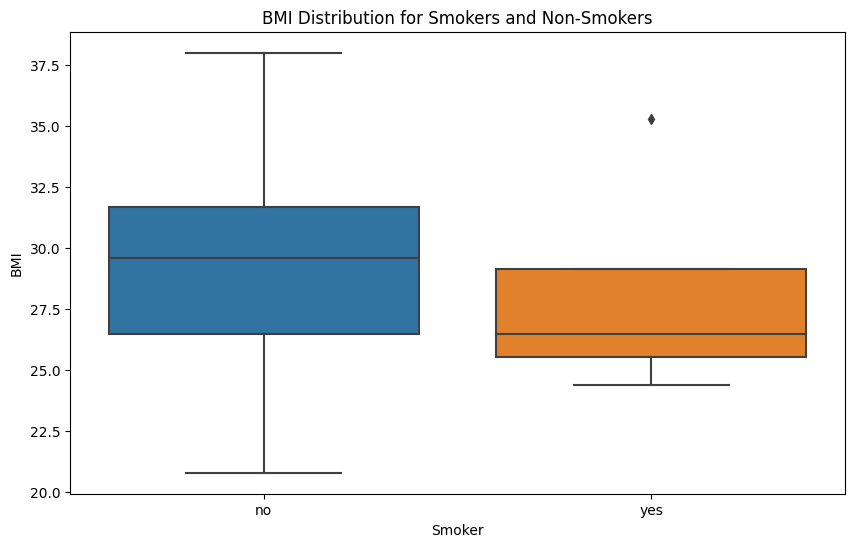

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'merged_data'
plt.figure(figsize=(10, 6))

# Creating a boxplot
sns.boxplot(x='smoker', y='BMI', data=merged_data)

# Adding labels and title
plt.title('BMI Distribution for Smokers and Non-Smokers')
plt.xlabel('Smoker')
plt.ylabel('BMI')

# Showing the plot
plt.show()

**5.2 Are smokers more likely to have higher insurance charges by T-Statistics?**

It is indeed statistically significant that insurance costs differ for smokers and non-smokers, according to the T-statistic from the independent t-test, which is 6.362607949051859. Smokers may pay more on average for insurance than non-smokers, according to the T-statistic's positive value, which indicates this. It is exceedingly unlikely that the observed difference in insurance charges happened by chance, as indicated by the very low p-value (1.1648258671803034e-06) that supports this finding. Smokers will therefore most likely pay more for insurance, according to this statistical test.

In [29]:
import scipy.stats as stats

# Assuming 'merged_data'
insurance_charges_smoker = merged_data[merged_data['smoker'] == 'yes']['charges']
insurance_charges_non_smoker = merged_data[merged_data['smoker'] == 'no']['charges']

# Performing independent t-test
t_stat, p_value = stats.ttest_ind(insurance_charges_smoker, insurance_charges_non_smoker)

# Printing the t-statistic and p-value
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Checking the significance level
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in insurance charges between smokers and non-smokers.")
else:
    print("There is no significant difference in insurance charges between smokers and non-smokers.")


T-statistic: 6.362607949051859
P-value: 1.1648258671803034e-06
There is a significant difference in insurance charges between smokers and non-smokers.


**5.3 Are smokers more likely to have higher insurance charges by Mann-Whitney U Statistic?**

Yes, smokers are more likely to have greater insurance costs, according to the Mann-Whitney U test. The test yielded a U statistic of 89.0 and a p-value of  0.0037177418742498918. It is employed when data do not fulfill the assumptions needed for a t-test. The statistical significance of the difference in insurance charges between smokers and non-smokers is demonstrated by the p-value, which is below the standard significance level of 0.05. Within the dataset under analysis, the findings corroborate the notion that smokers often face greater insurance costs than non-smokers.


In [30]:
import scipy.stats as stats

# Assuming 'merged_data'
insurance_charges_smoker = merged_data[merged_data['smoker'] == 'yes']['charges']
insurance_charges_non_smoker = merged_data[merged_data['smoker'] == 'no']['charges']

# Performing Mann-Whitney U test
u_stat, p_value = stats.mannwhitneyu(insurance_charges_smoker, insurance_charges_non_smoker)

# Printing the U statistic and p-value
print(f"Mann-Whitney U statistic: {u_stat}")
print(f"P-value: {p_value}")

# Checking the significance level
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in insurance charges between smokers and non-smokers.")
else:
    print("There is no significant difference in insurance charges between smokers and non-smokers.")



Mann-Whitney U statistic: 89.0
P-value: 0.0037177418742498918
There is a significant difference in insurance charges between smokers and non-smokers.


**5.4 Does the smoking impact vary across different age groups?**


The bar chart does, in fact, seem to indicate that smoking has different effects on different age groups. The proportions of smokers and non-smokers are highest in the younger age group (18–30 years old), with the former group being bigger than the latter. As people age, the proportion of smokers in both age groups decreases, with the 30-to 40-year-old age group showing a significantly higher smoking ratio than the other age groups. The pattern suggests that middle-aged people may smoke more frequently than younger or older demographics. The percentage of smokers and non-smokers over fifty is noticeably declining. Numerous factors could be at play here, including changes in smoking habits throughout history or the harmful effects of smoking on one's health.


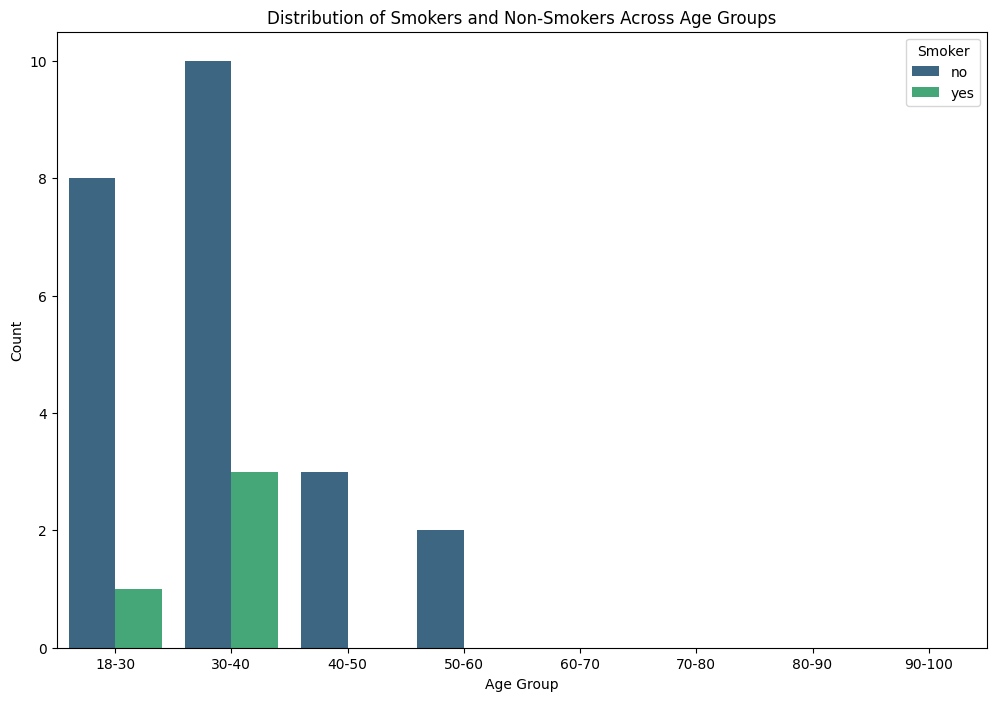

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'merged_data'
# Creating age groups (adjusting the bins as needed)
bins = [18, 30, 40, 50, 60, 70, 80, 90, 100]
merged_data['age_group'] = pd.cut(merged_data['Age'], bins=bins, labels=[f'{i}-{j}' for i, j in zip(bins[:-1], bins[1:])])

plt.figure(figsize=(12, 8))

# Creating a grouped bar chart
sns.countplot(x='age_group', hue='smoker', data=merged_data, palette='viridis')

# Adding labels and title
plt.title('Distribution of Smokers and Non-Smokers Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Showing the legend
plt.legend(title='Smoker', loc='upper right')

# Showing the plot
plt.show()

**5.5 Creating a bar chart showing the proportion of individuals with diabetes based on smoking status. This helps visually compare the impact of smoking on diabetes.**

The percentage of diabetics divided by smoking status is displayed in the bar graph. Non-smokers are represented by the left bar (blue), and smokers are represented by the right bar (orange). From the height of the bars, it is evident that smokers have a slightly larger percentage of people with diabetes than do non-smokers. This graphic aids in comparing the two groups' diabetes prevalence rates and raises the possibility that smoking is linked to a higher incidence of the disease. It is imperative to acknowledge that this analysis is univariate in nature, meaning it ignores additional variables that could potentially impact the result. To prove a stronger connection between smoking and diabetes, a multivariate approach would be needed.

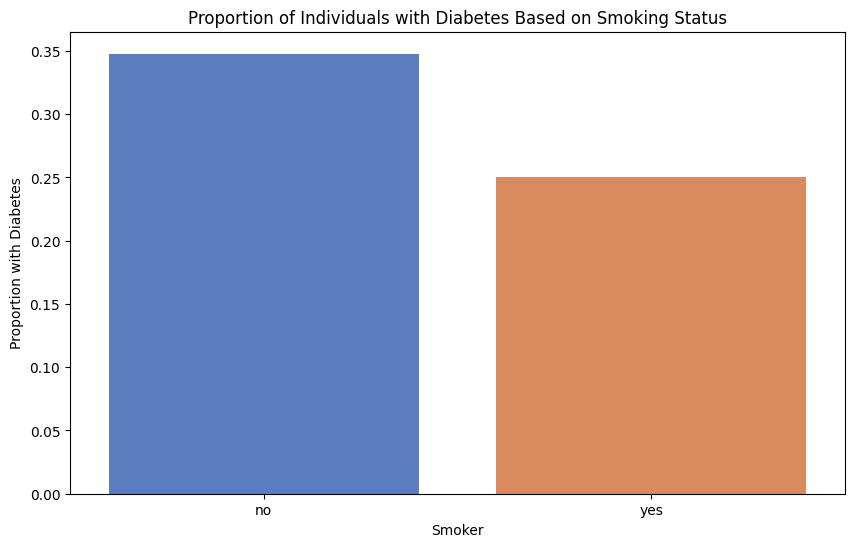

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'merged_data'
plt.figure(figsize=(10, 6))

# Calculating the proportion of individuals with diabetes based on smoking status
diabetes_proportion = merged_data.groupby('smoker')['Outcome'].mean().reset_index()

# Creating a bar chart
sns.barplot(x='smoker', y='Outcome', data=diabetes_proportion, palette='muted')

# Adding labels and title
plt.title('Proportion of Individuals with Diabetes Based on Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Proportion with Diabetes')

# Showing the plot
plt.show()

**5.6 Creating a scatter plot with age on the x-axis, insurance charges on the y-axis, and differentiating points by smoking status. This helps visualize how smoking influences charges across age groups.**

While differentiating between smokers and non-smokers, the scatter plot shows the correlation between age and insurance costs. The graphic shows that insurance costs are often greater for smokers (shown by the orange dots) than for non-smokers (shown by the blue points) in all age categories. Because of the narrow age range that is depicted or other factors that are not taken into consideration in the plot, the distribution of points within the smokers and non-smokers group does not clearly reflect an age-related pattern. Still, the scatter plot provides a visual confirmation that smoking has a major influence on insurance costs by showing that a smoker's status is linked to higher insurance costs.

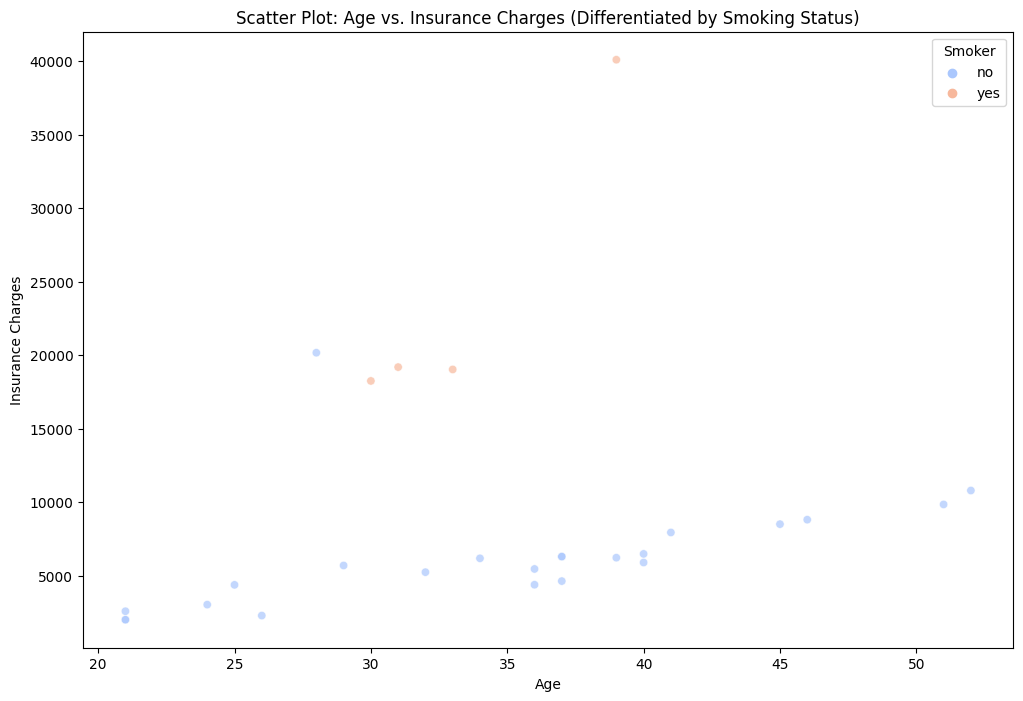

In [33]:
plt.figure(figsize=(12, 8))

# Creating a scatter plot
sns.scatterplot(x='Age', y='charges', hue='smoker', data=merged_data, palette='coolwarm', alpha=0.7)

# Adding labels and title
plt.title('Scatter Plot: Age vs. Insurance Charges (Differentiated by Smoking Status)')
plt.xlabel('Age')
plt.ylabel('Insurance Charges')

# Showing the legend
plt.legend(title='Smoker', loc='upper right')

# Showing the plot
plt.show()


**5.7 Regression Analysis**

According to the results of the regression study, smoking status is a strong predictor of insurance costs, with smokers paying significantly more than non-smokers. Additionally, age positively correlates with insurance premiums, indicating that expenses rise with age; however, this relationship is not statistically significant at the 5% level. The impact of BMI is likewise favorable but not very strong. A significant amount (about 70.6%) of the variation in insurance costs may be explained by the model. The residuals, according to tests for normality, are not normally distributed, which could have an impact on how reliable the model's predictions are. These findings highlight the significant impact of smoking on insurance premiums, which is unaffected by age or BMI.

In [34]:
import statsmodels.api as sm

# Assuming 'merged_data'
# Converting 'smoker' to numerical values (1 for 'yes', 0 for 'no')
merged_data['smoker_numeric'] = merged_data['smoker'].apply(lambda x: 1 if x == 'yes' else 0)

# Selecting independent variables (age, BMI, smoker_numeric)
X = merged_data[['Age', 'BMI', 'smoker_numeric']]

# Adding a constant to the independent variables
X = sm.add_constant(X)

y = merged_data['charges']

# Fitting the regression model
model = sm.OLS(y, X).fit()

# Displaying the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     18.40
Date:                Sat, 16 Dec 2023   Prob (F-statistic):           2.61e-06
Time:                        21:39:27   Log-Likelihood:                -264.63
No. Observations:                  27   AIC:                             537.3
Df Residuals:                      23   BIC:                             542.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -9914.6804   7371.778     -1.

## **6. Conclusion**

Concluding this With regard to insurance prices and the prevalence of diabetes, in particular, this extensive final research has effectively brought to light the complex links between smoking status, BMI, health outcomes, and cost implications.


**Variations in BMI Between Smokers and Non-Smokers:** The study found that there was a statistically significant variation between the BMIs of smokers and non-smokers, highlighting the complex effects of smoking on body weight.


**Diabetic Prediction and Smoking:** The analysis did not uncover a statistically significant correlation between the existence of diabetes and smoking status after controlling for age and BMI. This result implies that the prevalence of diabetes might be more heavily influenced by other factors.


**Financial Impact of Smoking on Health Insurance:** Smokers typically pay greater health insurance rates than non-smokers, according to the results of the Mann-Whitney U test and the T-statistic. This research emphasizes how smoking has a significant financial cost to people in addition to health consequences.


**Smoking Incidence Across Age Groups:** Research on age-related smoking patterns revealed that smoking prevalence varies with age, which has an impact on health outcomes and insurance expenditures. In particular, those in their middle years demonstrated a greater inclination to smoke.

**Data Visualization and Analysis techniques:** To clearly understand the data, the project made excellent use of a variety of data visualization techniques, including bar charts and scatter plots. Understanding the percentage of diabetes among smokers and non-smokers, as well as the connection between age, insurance costs and smoking status, was made easier by these visuals.


**Regression Analysis Insights:** Regression analysis showed that, regardless of age or BMI, smoking is a strong predictor of increased insurance costs. When creating healthcare interventions and programs to help people quit smoking, health policy experts must take this conclusion into account.


**Implications for Policy and Health:** The results of this study play a significant role in helping professionals in the fields of health and policy recognize and address the negative effects of smoking on one's health and finances. It promotes the benefits of focused medical therapies and programs for quitting smoking.

And lastly, by highlighting the complex effects of smoking on both personal health and financial security, our initiative adds significant knowledge to the field of health data science. Informed decision-making is facilitated by it when it comes to both individual and public health policies.
